<a href="https://colab.research.google.com/github/allebasil/hello-world/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install BioPython

In [1]:
# Install BioPython
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.2 MB/s eta 0:00:00


## Load in fna files (sequences)


In [2]:
# Use the left sidebar to upload the sequences file

# Copy the file path and make it equal to "sequence_path" so the file path does not have to be repasted into future code
sequences_path = "/content/sequences.fna"

# Load in fna files (sequences)

from Bio import SeqIO
for seq_record in SeqIO.parse(sequences_path, "fasta"):
  print(seq_record.id)
  print(repr(seq_record.seq))
  print(len(seq_record))

Sequence_1
Seq('atggcgaacaccattaacctggtgaccaaatttgcgccgtatgtggatgaacag...gcg')
852
Sequence_2
Seq('atggcgattgatctggtggcgaaatttctgccgtatgtggatgaaatgtttacc...gcg')
843
Sequence_3
Seq('atgaccgtgaaagcgatggcgctgaacaccaaccagctgtttgcgtatctgaac...gcg')
1053
Sequence_4
Seq('atgagcaaaattgcggtgatttatgcgcgctatagcagcgataaacagaccgaa...ttt')
1494
Sequence_5
Seq('atgtgcgtgtatggctattgccgcattagcaccaaacagcagagcattgaacgc...taa')
678
Sequence_6
Seq('atgagccgcaccctgagcggcgatcatcagtattatctggataaatatgcgaaa...taa')
1380


## Analyze sequence properties

In [3]:
# List the sequences lengths and their GC values

from Bio import SeqIO
from Bio.SeqUtils import gc_fraction

for seq_record in SeqIO.parse(sequences_path, "fasta"):
    print(f"Sequence ID: {seq_record.id}, Length: {len(seq_record)}, GC Content: {100 * gc_fraction(seq_record.seq):.2f}%")


Sequence ID: Sequence_1, Length: 852, GC Content: 55.87%
Sequence ID: Sequence_2, Length: 843, GC Content: 52.55%
Sequence ID: Sequence_3, Length: 1053, GC Content: 51.95%
Sequence ID: Sequence_4, Length: 1494, GC Content: 51.74%
Sequence ID: Sequence_5, Length: 678, GC Content: 46.76%
Sequence ID: Sequence_6, Length: 1380, GC Content: 53.26%


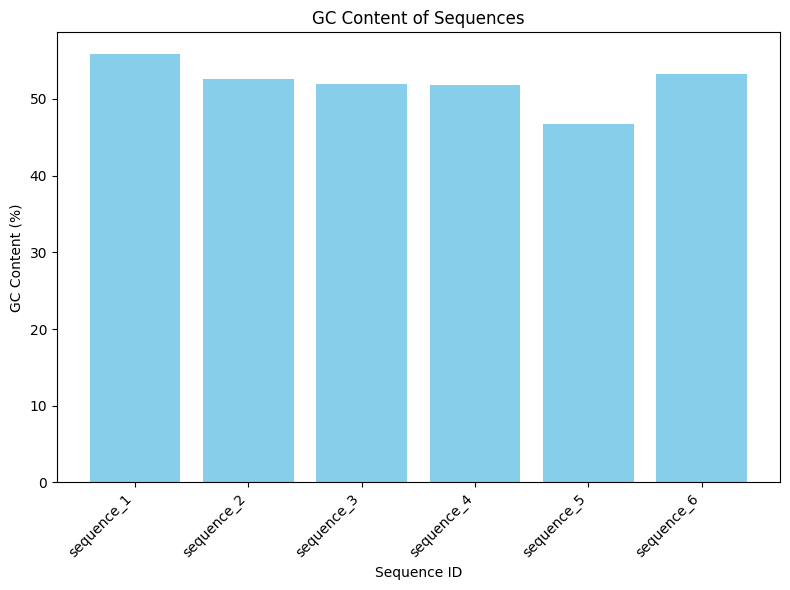

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Prepare the data
sequence_ids = ['sequence_1', 'sequence_2', 'sequence_3', 'sequence_4', 'sequence_5', 'sequence_6']
gc_contents = [55.87, 52.55, 51.95, 51.74, 46.76, 53.26]

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(sequence_ids, gc_contents, color='skyblue')
plt.xlabel("Sequence ID")
plt.ylabel("GC Content (%)")
plt.title("GC Content of Sequences")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

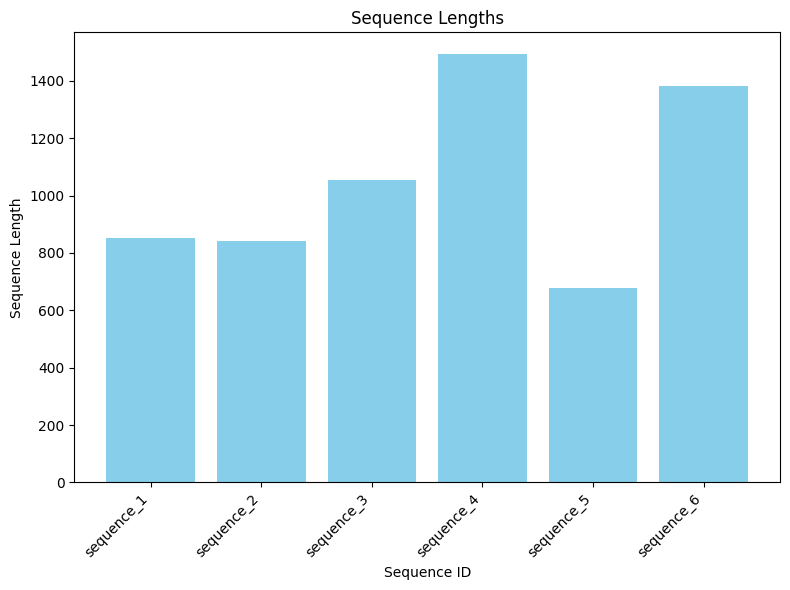

In [5]:

# Necessary libraries were already imported in the previous step

# Prepare the data
sequence_ids = ['sequence_1', 'sequence_2', 'sequence_3', 'sequence_4', 'sequence_5', 'sequence_6']
sequence_lengths = [852, 843, 1053, 1494, 678, 1380]

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(sequence_ids, sequence_lengths, color='skyblue')
plt.xlabel("Sequence ID")
plt.ylabel("Sequence Length")
plt.title("Sequence Lengths")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Translate the sequences

In [6]:
# Translate the sequences

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Assuming you have a translation table (e.g., 11 for standard code)
translation_table = 11

translated_sequences = []
for seq_record in SeqIO.parse(sequences_path, "fasta"):
    try:
        # Translate the sequence
        translated_seq = seq_record.seq.translate(table=translation_table)
        # Create a new SeqRecord for the translated sequence
        translated_record = SeqRecord(
            translated_seq,
            id=seq_record.id + "_translated",  # Add a suffix to the ID
            description="Translated sequence"
        )
        translated_sequences.append(translated_record)
    except Exception as e:
        print(f"Error translating sequence {seq_record.id}: {e}")


# You can now save the translated sequences to a new file
SeqIO.write(translated_sequences, "translated_sequences.fasta", "fasta")

# Example of how to access the translated sequence information
for translated_record in translated_sequences:
    print(translated_record.id)
    print(repr(translated_record.seq))
    print(len(translated_record))


Sequence_1_translated
Seq('MANTINLVTKFAPYVDEQFTSESKLSLLTNHDFDWTGAHTVKVYKIGTSAMNDY...SKA')
284
Sequence_2_translated
Seq('MAIDLVAKFLPYVDEMFTTESKKSVLTNNDFQWTGAHTVKVYKINTAPMTDYDR...EGA')
281
Sequence_3_translated
Seq('MTVKAMALNTNQLFAYLNRGDIAEFKFSPLFTTLFFPNVATFSTQNIMLDTLDI...KIA')
351
Sequence_4_translated
Seq('MSKIAVIYARYSSDKQTEDSIEAQVRACREYAAAHGLSVVDVYTDEAISGKGSK...ATF')
498
Sequence_5_translated
Seq('MCVYGYCRISTKQQSIERQIRNIKAEYDKAVIITEAYSGTTMNRPEWNKLYKKA...TE*')
226
Sequence_6_translated
Seq('MSRTLSGDHQYYLDKYAKMAKAAALEEQRAAEIENRHNEIMDAMEEQQRERAEL...MT*')
460


## Alignment of nucleotide sequences

In [7]:
# Align sequences as nucleotides

from Bio import AlignIO
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align.Applications import MafftCommandline # Import MafftCommandline
import io # Import the io module

# Install Mafft if not already installed
!apt-get update # Update the package list
!apt-get install mafft # Install Mafft using apt-get

# Use Mafft for alignment
mafft_cline = MafftCommandline(input=sequences_path) # Define Mafft command-line object
stdout, stderr = mafft_cline() # Execute Mafft

# Parse the alignment output
# Use StringIO to create a file-like object from the stdout string
alignment = AlignIO.read(io.StringIO(stdout), "fasta") # Parse the alignment using StringIO

# Print the alignment (or further process it)
print(alignment)

# Save the alignment to a file
AlignIO.write(alignment, "aligned_sequences_nucleotide.fasta", "fasta")

/usr/local/lib/python3.11/dist-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,239 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,892 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,737 kB]
Get:13 http://security.ubuntu.com/ub

1

## Alignment of protein sequences

In [8]:
# Copy the file path and make it equal to "protein_fasta_file" so the file path does not have to be repasted into future code
protein_fasta_file = ("/content/translated_sequences.fasta")

# Use Mafft for alignment
mafft_cline = MafftCommandline(input=protein_fasta_file)
stdout, stderr = mafft_cline()

# Parse the alignment output
alignment = AlignIO.read(io.StringIO(stdout), "fasta")

# Print the alignment
print(alignment)

# Save the protein alignment to a file
AlignIO.write(alignment, "aligned_sequences_protein.fasta", "fasta")

Alignment with 6 rows and 627 columns
-----MANTINLVTKFAPYVDEQFTS------------ESKLS-...--- Sequence_1_translated
-----MA--IDLVAKFLPYVDEMFTT------------ESKKS-...--- Sequence_2_translated
MTVKAMALNTNQLFAYLN-----------RGDIA----EFKFS-...--- Sequence_3_translated
-----MS---KIAVIYARYSSDKQTEDSIEAQVRACR-EYAAAH...ATF Sequence_4_translated
----------MCVYGYCRISTKQQSI---ERQIRNIKAEYDKA-...--- Sequence_5_translated
-----MS---RTLSGDHQYYLDKYAK---MAKAAALE-EQRAA-...--- Sequence_6_translated


1

## Estimate similarity between sequences

In [9]:
from Bio import AlignIO
from Bio import SeqIO
from Bio.Align import substitution_matrices

# Load a predefined substitution matrix (e.g., BLOSUM62)
matrix = substitution_matrices.load("BLOSUM62")

print("BLOSUM62")

# Load the nucleotide alignment
nuc_alignment = AlignIO.read("aligned_sequences_protein.fasta", "fasta")

# Load the protein alignment
prot_alignment = AlignIO.read("/content/aligned_sequences_protein.fasta", "fasta")

# Calculate nucleotide sequence similarity
nuc_similarity_scores = []
for record in nuc_alignment:
    similarity = 0
    for i in range(len(nuc_alignment[0])):
      if nuc_alignment[0][i] == record[i]:
        similarity += 1
    nuc_similarity_scores.append(similarity / len(nuc_alignment[0]))


# Calculate protein sequence similarity
# matrix = substitution_matrices.load(sequences_path, "fasta")  # Remove or comment out this line

prot_similarity_scores = []
for record in prot_alignment:
    similarity = 0
    for i in range(len(prot_alignment[0])):
        a = prot_alignment[0][i]
        b = record[i]
        # Convert amino acid letters to uppercase
        a = a.upper()
        b = b.upper()
        if a != "-" and b != "-":
              similarity += matrix[a, b]

    prot_similarity_scores.append(similarity)


  # Print the similarity scores
print("Nucleotide Similarity Scores:", nuc_similarity_scores)
print("Protein Similarity Scores:", prot_similarity_scores)

  # Save the similarity scores to a file


BLOSUM62
Nucleotide Similarity Scores: [1.0, 0.8580542264752791, 0.39074960127591707, 0.22009569377990432, 0.45454545454545453, 0.23763955342902712]
Protein Similarity Scores: [1446.0, 1037.0, 130.0, 189.0, 44.0, 142.0]


In [10]:
import csv
from Bio import AlignIO
from Bio import SeqIO
from Bio.Align import substitution_matrices

# ... (your existing code for calculating similarity scores) ...

# Save the similarity scores to a CSV file
with open('similarity_scores.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Sequence ID", "Nucleotide Similarity", "Protein Similarity"])
    for i, record in enumerate(nuc_alignment):
        writer.writerow([record.id, nuc_similarity_scores[i], prot_similarity_scores[i]])

print("Similarity scores saved to similarity_scores.csv")

Similarity scores saved to similarity_scores.csv


In [11]:
# Create a matrix containing the paired distances between the nucleotide sequences

import numpy as np

# Assuming 'prot_alignment' is your protein alignment object from Biopython
# and you want to compute the distance matrix

num_sequences = len(prot_alignment)
distance_matrix = np.zeros((num_sequences, num_sequences))

for i in range(num_sequences):
    for j in range(i + 1, num_sequences):
        seq1 = prot_alignment[i]
        seq2 = prot_alignment[j]

        distance = 0  # Initialize the distance
        for k in range(len(seq1)):
            if seq1[k] != seq2[k]:
              distance +=1  # Increment distance for mismatches

        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance # Distance matrix is symmetric


distance_matrix


array([[  0.,  89., 382., 489., 342., 478.],
       [ 89.,   0., 388., 488., 339., 470.],
       [382., 388.,   0., 523., 401., 469.],
       [489., 488., 523.,   0., 443., 472.],
       [342., 339., 401., 443.,   0., 459.],
       [478., 470., 469., 472., 459.,   0.]])

In [12]:
print(matrix["M", "M"])

5.0


## Generate phylogenetic trees for the aligned sequences.

<Figure size 640x480 with 0 Axes>

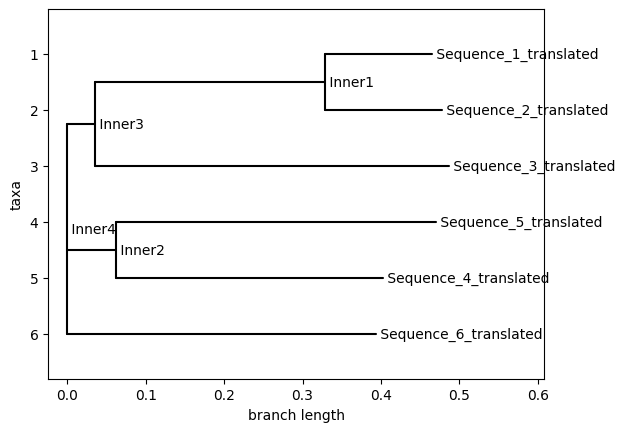

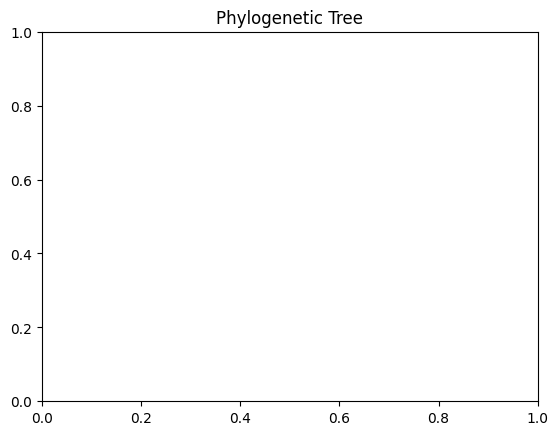

In [13]:

# Generate phylogenetic trees for the aligned sequences and aligned protein sequences

from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Calculate the distance matrix (you already have this from the previous code)
# ... (your existing distance matrix calculation code) ...

# Create a DistanceCalculator object (for protein sequences)
calculator = DistanceCalculator("blosum62") # Use the BLOSUM62 matrix

# Calculate the distance matrix using the protein alignment
dm = calculator.get_distance(prot_alignment)

# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor(calculator, 'nj') # Use the neighbor-joining method

# Construct the phylogenetic tree
tree = constructor.build_tree(prot_alignment)
#Or use the distance matrix directly
#tree = constructor.upgma(dm)

# Draw and title the tree
plt.figure(1)  # Create a figure for the tree
Phylo.draw(tree)
plt.title("Phylogenetic Tree")  # Add title
plt.show()

## Making predictions using BLAST Search and Hidden Markov Models

In [23]:
# Convert the translated_sequences.fasta file into list format

translated_sequences = "/content/translated_sequences.fasta"

from Bio import SeqIO

def fasta_to_list(translated_sequences):
  """
  Converts a FASTA file into a list of sequences.

  Args:
    fasta_file: Path to the FASTA file.

  Returns:
    A list of sequences (strings) from the FASTA file.
  """
  sequences = []
  for record in SeqIO.parse(translated_sequences, "fasta"):
    sequences.append(str(record.seq))  # Convert Seq object to string
  return sequences

# Example usage:
fasta_file = "/content/translated_sequences.fasta"  # Replace with your file path
sequence_list = fasta_to_list(fasta_file)

# Print the list of sequences
print(sequence_list)

['MANTINLVTKFAPYVDEQFTSESKLSLLTNHDFDWTGAHTVKVYKIGTSAMNDYDRSGANVETNWSRFGPVAGLDAITEEMTLKKDRSFTFAIDKLDTDETAQQLAGATALARQNREVVIPEVDSYPYGIMATKAGTKPTAVTLTADNIYTEILKASETLDDAEVPETERVLVVSPSVYALMKKSADITLDSDVGQEQRMKGVIAMMDGAQVVKVPAVRLPENFGFMLAHPSATVAPVKLEDYRVHQDPPGLSGALVEGRICYDAFVLDNKVKAIYYMAQPSKA', 'MAIDLVAKFLPYVDEMFTTESKKSVLTNNDFQWTGAHTVKVYKINTAPMTDYDREGTGTGANGSRYGAVASLDATTEEFTLKKDRSFTFAIDKLDNDETVQQLGGATALARQQREIIIPEVDGYVYGVMCQNAGNKPAAITLTAENICDEIFKANTALDNAEVPETNRILVVTPDTYLLMKQSGDIFLNTDIAEDMRLKGIIAQFDGAKVIKVPSNRLPDDFGFMLVHPSATVAPTKLEDYKIHQDPPGISGDLVEGRICYDAFVLDNKKKAIYYQAVEGA', 'MTVKAMALNTNQLFAYLNRGDIAEFKFSPLFTTLFFPNVATFSTQNIMLDTLDIEEVTMSAFCSPMVGSQVQRDKGYETSTIKPGYMKPKHEIDPTKTIMRMAGEDPAQLNDPTYRRMRLITGNMRRQINAIKARVEWLAVNAVTTGKNIIEGEGIERYEIDWKIPEKNIIEQADGKKWSEQDKETHYPIYDIELYADQAGCPANVMIMGAEVWRTLRSFKKFRELYDLSRGSESAAELACKNLGEVVSFKGYLGDLALIVYSGKYTDSDGTEKYFLEPDLLVLGNTNNKGLVAYGAIMDQEAVRTGATQNMFYPKNWIEDGDPAIEYVQTHSAPQPVPADIRKFVTVKIA', 'MSKIAVIYARYSSDKQTEDSIEAQVRACREYAAAHGLSVVDVYTDEAISGKGSKTANRRQYQRLLRDCGK

In [26]:
import os
import re
import requests
from io import StringIO

import pandas as pd
from Bio import SeqIO, Phylo
from Bio.Blast import NCBIWWW, NCBIXML
from lxml import etree

# Use the interactively provided FASTA file.
INPUT_FASTA = sequences_path
OUTPUT_DIR = "/content"

def blast_query(seq_record, program="blastx", db="nr", hitlist_size=5, out_dir=OUTPUT_DIR):
    """
    Executes a BLAST search on a sequence record and extracts function and organism predictions.

    Parameters:
        seq_record: A Bio.SeqRecord object.
        program (str): BLAST program (default "blastx").
        db (str): BLAST database (default "nr").
        hitlist_size (int): Number of hits to consider.
        out_dir (str): Directory to save BLAST results.

    Returns:
        tuple: (Function prediction string, organism prediction string)
    """
    sid = seq_record.id
    print(f"Starting BLAST for {sid}...")
    try:
        result_xml = NCBIWWW.qblast(program, db, seq_record.seq, hitlist_size=hitlist_size).read()
    except Exception as ex:
        print(f"BLAST error for {sid}: {ex}")
        result_xml = ""
    blast_file = os.path.join(out_dir, f"{sid}_blast.xml")
    with open(blast_file, "w") as fh:
        fh.write(result_xml)
    print(f"BLAST results for {sid} saved at {blast_file}.")

    func_hits, org_hits = [], []
    try:
        with open(blast_file) as fh:
            blast_rec = NCBIXML.read(fh)
            if blast_rec.alignments:
                for alignment in blast_rec.alignments[:hitlist_size]:
                    func_hits.append(alignment.hit_def)
                    m = re.search(r'\[(.*?)\]', alignment.hit_def)
                    org_hits.append(m.group(1) if m else "Unknown")
            else:
                print(f"No BLAST hits found for {sid}.")
    except Exception as ex:
        print(f"Error parsing BLAST output for {sid}: {ex}")

    return ("; ".join(func_hits) if func_hits else "No hit",
            "; ".join(org_hits) if org_hits else "Unknown")

def hmmer_query(protein_seq, sid, hmmdb="pfam", out_dir=OUTPUT_DIR):
    """
    Submits a protein sequence to the online HMMER service and retrieves the XML result.

    Parameters:
        protein_seq: Protein sequence (Bio.Seq object).
        sid (str): Sequence identifier.
        hmmdb (str): HMMER database (default "pfam").
        out_dir (str): Directory to save HMMER results.

    Returns:
        str: Raw XML result from HMMER.
    """
    url = "https://www.ebi.ac.uk/Tools/hmmer/search/hmmscan"
    payload = {"hmmdb": hmmdb, "seq": str(protein_seq), "domE": "1e-5"}
    headers = {"Expect": "", "Accept": "text/xml"}
    print(f"Submitting HMMER query for {sid}...")
    response = requests.post(url, data=payload, headers=headers)
    if response.status_code != 200:
        raise Exception(f"HMMER error for {sid}: {response.status_code}")
    xml_result = response.text
    hmmer_file = os.path.join(out_dir, f"{sid}_hmmer.xml")
    with open(hmmer_file, "w") as fh:
        fh.write(xml_result)
    print(f"HMMER results for {sid} stored at {hmmer_file}.")
    return xml_result

def extract_domains(xml_data):
    """
    Parses HMMER XML output and extracts domain predictions.

    Parameters:
        xml_data (str): Raw XML from HMMER.

    Returns:
        str: Semicolon-separated string of domain predictions.
    """
    domains = []
    try:
        parser = etree.XMLParser(recover=True)
        root = etree.fromstring(xml_data.encode("utf-8"), parser=parser)
        results = root.find(".//data[@name='results']")
        if results is not None:
            for hit in results.findall("hits"):
                hit_name = hit.get("name") or "UnknownHit"
                for dom in hit.findall("domains"):
                    dom_name = dom.get("alihmmname") or hit_name
                    e_val = dom.get("ievalue") or dom.get("evalue") or "N/A"
                    domains.append(f"{dom_name} (E={e_val})")
    except Exception as ex:
        print(f"Error parsing HMMER XML: {ex}")
    return "; ".join(domains) if domains else "No domains detected"

def run_prediction_pipeline(fasta_file=INPUT_FASTA, out_dir=OUTPUT_DIR):
    """
    Main pipeline that performs BLAST and online HMMER queries on each sequence,
    and saves domain, organism, and function predictions to CSV files.
    """
    records = list(SeqIO.parse(fasta_file, "fasta"))
    domain_results, org_func_results, overall_org = [], [], []

    for rec in records:
        sid = rec.id
        print(f"\nProcessing sequence {sid}...")
        func_pred, org_pred = blast_query(rec)
        org_func_results.append({
            "Sequence_ID": sid,
            "Predicted_Organism": org_pred,
            "Function_Prediction": func_pred
        })

        protein = rec.seq.translate(to_stop=True)
        try:
            hmmer_xml = hmmer_query(protein, sid)
        except Exception as ex:
            print(f"HMMER query failed for {sid}: {ex}")
            hmmer_xml = ""
        domain_results.append({
            "Sequence_ID": sid,
            "Domain_Predictions": extract_domains(hmmer_xml) if hmmer_xml else "No domains detected"
        })
        overall_org.append({
            "Sequence_ID": sid,
            "Predicted_Organism": org_pred
        })

    pd.DataFrame(domain_results).to_csv(os.path.join(out_dir, "domain_predictions.csv"), index=False)
    print(f"Domain predictions saved to {os.path.join(out_dir, 'domain_predictions.csv')}")

    pd.DataFrame(org_func_results).to_csv(os.path.join(out_dir, "organism_predictions.csv"), index=False)
    print(f"Organism & function predictions saved to {os.path.join(out_dir, 'organism_predictions.csv')}")

    pd.DataFrame(overall_org).to_csv(os.path.join(out_dir, "organism_overall.csv"), index=False)
    print(f"Overall organism predictions saved to {os.path.join(out_dir, 'organism_overall.csv')}")

# Execute the prediction pipeline.
run_prediction_pipeline()



Processing sequence Sequence_1...
Starting BLAST for Sequence_1...
BLAST results for Sequence_1 saved at /content/Sequence_1_blast.xml.
Submitting HMMER query for Sequence_1...
HMMER results for Sequence_1 stored at /content/Sequence_1_hmmer.xml.

Processing sequence Sequence_2...
Starting BLAST for Sequence_2...
BLAST results for Sequence_2 saved at /content/Sequence_2_blast.xml.
Submitting HMMER query for Sequence_2...
HMMER results for Sequence_2 stored at /content/Sequence_2_hmmer.xml.

Processing sequence Sequence_3...
Starting BLAST for Sequence_3...
BLAST results for Sequence_3 saved at /content/Sequence_3_blast.xml.
Submitting HMMER query for Sequence_3...
HMMER results for Sequence_3 stored at /content/Sequence_3_hmmer.xml.

Processing sequence Sequence_4...
Starting BLAST for Sequence_4...
BLAST results for Sequence_4 saved at /content/Sequence_4_blast.xml.
Submitting HMMER query for Sequence_4...
HMMER results for Sequence_4 stored at /content/Sequence_4_hmmer.xml.

Process